In [6]:
library(tidyverse)

In [7]:
incident = read.csv("./NIBRS_month.csv")
offense = read.csv("./NIBRS_OFFENSE.csv")
offender = read.csv("./NIBRS_OFFENDER.csv")
victim = read.csv("./NIBRS_VICTIM.csv")

In [8]:
head(offense)

,data_year,offense_id,incident_id,offense_code,attempt_complete_flag,location_id,num_premises_entered,method_entry_code
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,2022,181625733,151569497,23H,C,25,NA,
2,2022,182978559,152750784,13B,C,40,NA,
3,2022,185931304,155326464,240,C,25,NA,
4,2022,187690885,156857304,13B,C,35,NA,
5,2022,196068971,164157796,26B,C,35,NA,
6,2022,185929400,155324870,240,C,25,NA,


In [9]:
offense_type = read.csv("./Codes/NIBRS_OFFENSE_TYPE.csv")
offense_type %>%
    filter(offense_code == "240")

offense_code,offense_name,crime_against,ct_flag,hc_flag,hc_code,offense_category_name,offense_group
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
240,Motor Vehicle Theft,Property,t,t,7,Motor Vehicle Theft,A


In [10]:
car_theft_id = offense %>%
    filter(offense_code == "240") %>%
    select(incident_id)

In [11]:
car_theft_victim = victim %>%
    filter(incident_id %in% car_theft_id[,1])
head(car_theft_victim)

,data_year,victim_id,incident_id,victim_seq_num,victim_type_id,assignment_type_id,activity_type_id,outside_agency_id,age_id,age_num,sex_code,race_id,ethnicity_id,resident_status_code,age_range_low_num,age_code_range_high
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
1,2022,171606164,155326464,1,4,NA,NA,NA,48,45,M,20,20,,45,NA
2,2022,171604258,155324870,1,4,NA,NA,NA,89,86,M,20,20,R,86,NA
3,2022,170501644,154371166,1,4,NA,NA,NA,59,56,F,20,20,N,56,NA
4,2022,165003174,149544227,1,4,NA,NA,NA,59,56,F,20,40,,56,NA
5,2022,165003175,149544227,2,4,NA,NA,NA,60,57,M,20,20,,57,NA
6,2022,165003176,149544227,3,8,NA,NA,NA,104,NS,X,99,50,,NA,NA


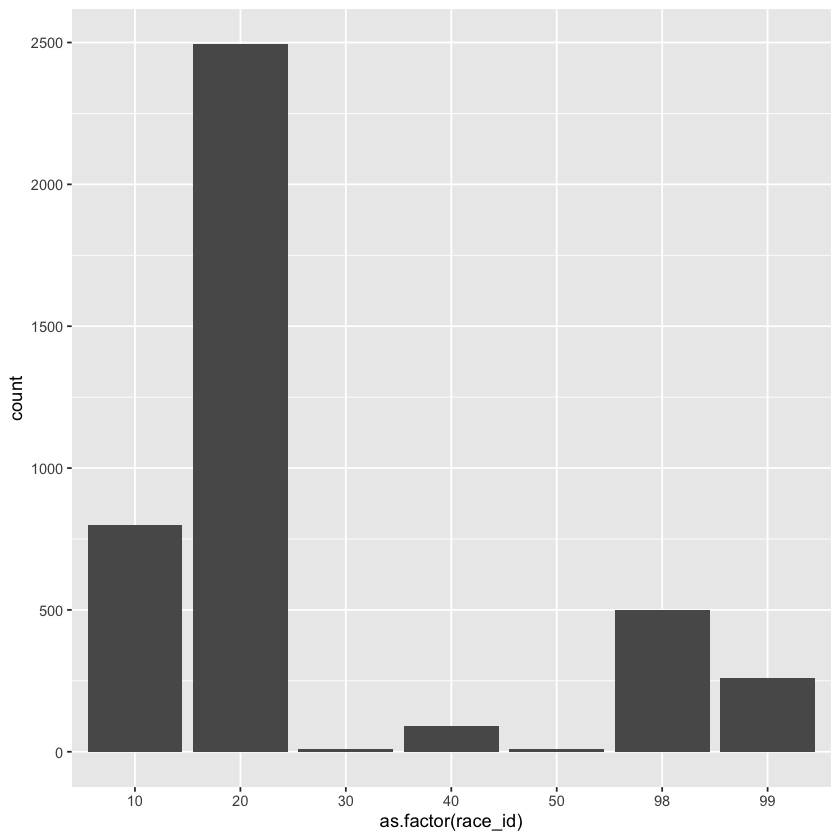

In [12]:
car_theft_victim %>%
    ggplot(aes(x = as.factor(race_id))) +
    geom_bar()

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message:
"Removed 261 rows containing non-finite values (`stat_bin()`)."


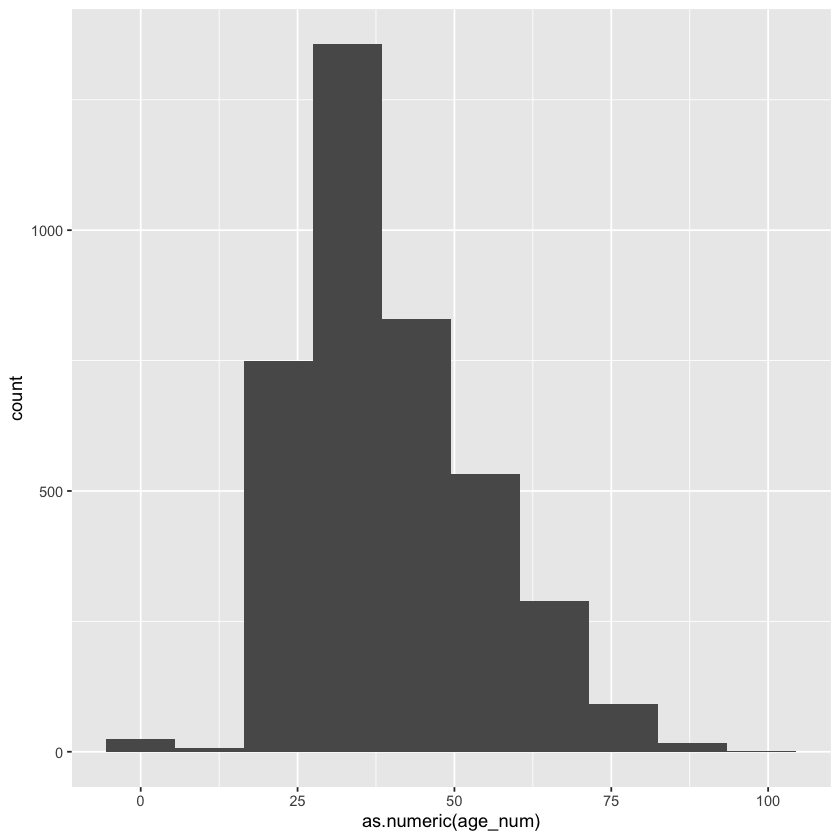

In [13]:
car_theft_victim %>%
    ggplot(aes(x = as.numeric(age_num))) +
    geom_histogram(bins = 10)

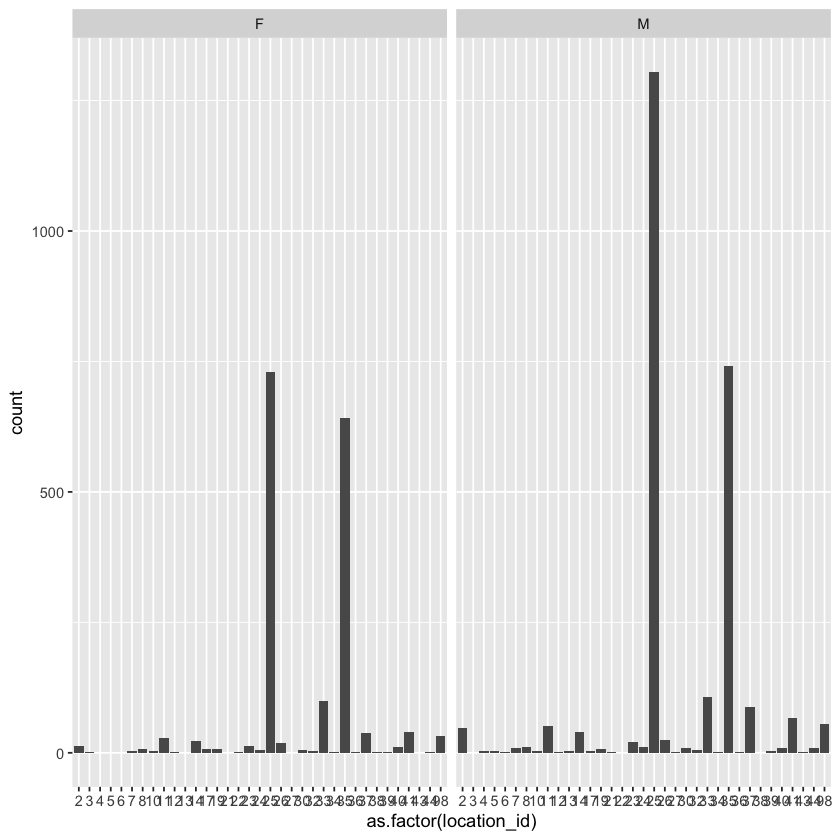

In [14]:
offense %>%
    filter(incident_id %in% car_theft_id[,1]) %>%
    merge(car_theft_victim, by = "incident_id") %>%
    filter(sex_code %in% c("F", "M")) %>%
    ggplot(aes(x = as.factor(location_id))) +
    geom_bar() +
    facet_grid(~sex_code)

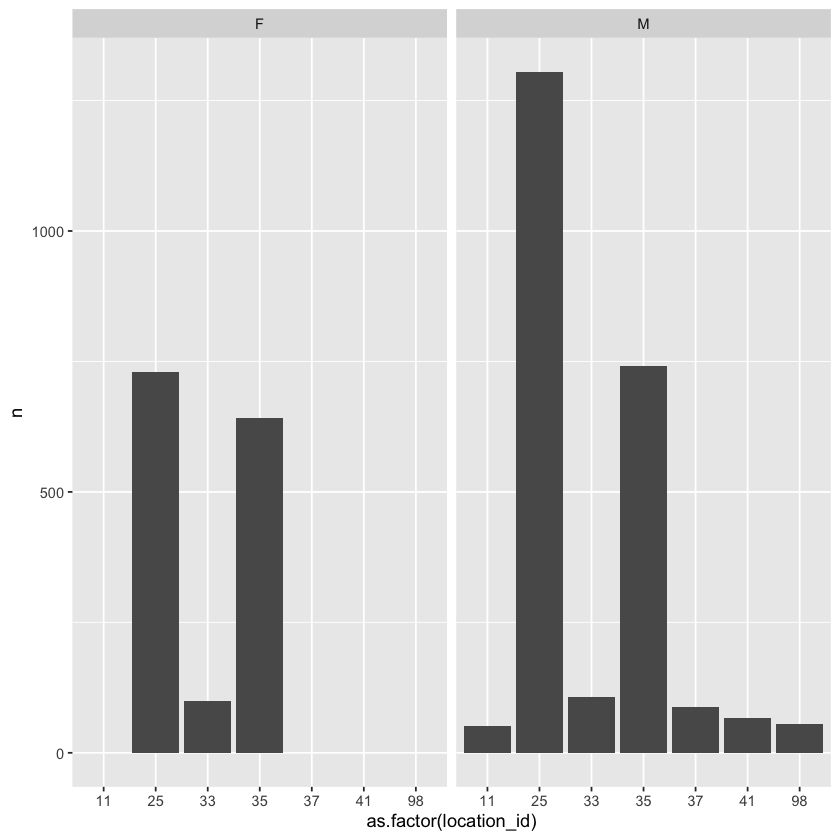

In [15]:
offense %>%
    filter(incident_id %in% car_theft_id[,1]) %>%
    merge(car_theft_victim, by = "incident_id") %>%
    filter(sex_code %in% c("F", "M")) %>%
    count(location_id, sex_code) %>%
    filter(n > 50) %>%
    ggplot(aes(x = as.factor(location_id), y = n)) +
    geom_bar(stat = "identity") +
    facet_grid(~sex_code)

In [16]:
location_type = read.csv("./Codes/NIBRS_LOCATION_TYPE.csv")
location_type %>%
    filter(location_id %in% c(25, 33, 35, 37, 41, 98))

location_id,location_code,location_name
<int>,<int>,<chr>
25,13,Highway/Road/Alley/Street/Sidewalk
33,18,Parking/Drop Lot/Garage
35,20,Residence/Home
37,21,Restaurant
41,23,Service/Gas Station
98,25,Other/Unknown
